# 5.1 선형 SVM 분류
- 라지 마진 분류 : SVM 분류기를 클래스 사이에 가장 폭이 넓은 도로를 찾는 것으로 생각할 수 있다.
- 경계에 위치한 샘플에 의해 전적으로 결정된다.(서포트 벡터)
- SVM은 특성의 스케일에 민감하다. 

## 5.1.1 소프트 마진 분류
- 하드 마진 분류 : 모든 샘플이 도로 바깥쪽에 올바르게 분류되어 있는 것
    - 데이터가 선형적으로 구분될 수 있어야 제대로 작동
    - 이상치에 민감 
- 소프트 마진 분류 : 도로의 폭을 가능한 한 넓게 유지하고 마진 오류 사이에 적절한 균형을 잡는 것 
    

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:,(2,3)] #꽃잎 길이, 꽃잎 너비
y = (iris["target"]==2).astype(np.float64) 

svm_clf = Pipeline([
    ("sclaer", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X,y)

Pipeline(steps=[('sclaer', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [3]:
svm_clf.predict([[5.5,1.7]])

array([1.])

- SVM 분류기는 클래스에 대한 확률 제공X

# 5.2 비선형 SVM 분류

In [4]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples=100, noise = 0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("sclaer", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss='hinge'))
])

polynomial_svm_clf.fit(X,y)

C:\Users\qual9\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('sclaer', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [5]:
X[0],y[0]

(array([ 0.21349784, -0.06441746]), 1)

In [6]:
X[30],y[30]

(array([1.76796495, 0.10043691]), 1)

In [7]:
polynomial_svm_clf.predict([[3,0.5]])

array([1], dtype=int64)

In [8]:
polynomial_svm_clf.predict([[-1,0.5]])

array([0], dtype=int64)

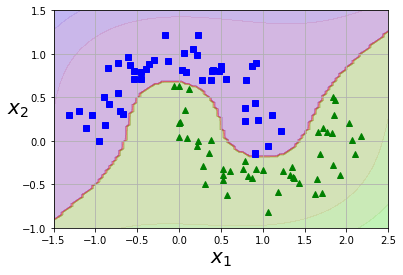

In [9]:
import matplotlib.pyplot as plt

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

## 5.2.1 다항식 커널
- 커널 트릭 : 실제로는 특서을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있음. 

In [10]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("sclaer",StandardScaler()),
    ("svm_clf",SVC(kernel="poly", degree = 3, coef0=1,C=5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('sclaer', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

모델이 과대적합이라면 다항식의 차수를 줄여야하고 과소적합이라면 차수를 늘려야한다. 

coef0 : 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절

## 5.2.2 유사도 특성
- 비선형 특성을 다루는 또 다른 기법은 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 유사도 함수로 계싼한 특성 추가
- 가우시안 방사 기저 함수(RBF)를 유사도 함수로 정의 
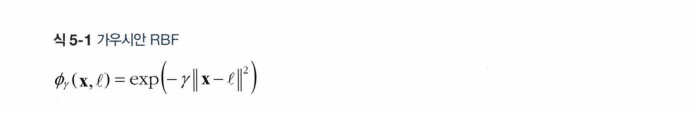
  - 0 : 랜드마크에서 아주 멀리 떨어진 경우
  - 1 : 랜드마크와 같은 위치일 경우
  - 종 모양 

## 5.2.3 가우시안 RBF 커널

In [11]:
rbf_kernerl_svm_clf = Pipeline([
    ("sclaer", StandardScaler()),
    ("svm_clf",SVC(kernel="rbf", gamma = 5, C=0.001))
])

rbf_kernerl_svm_clf.fit(X,y)

Pipeline(steps=[('sclaer', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

- gamma 증가 -> 종 모양 그래프가 좁아져서 각 샘플의 영향 범위가 작아진다. 결정 경계가 조금 더 불규칙해지고 각 샘플을 따라 구불구불하게 휘어진다
- gamma 감소 -> 넓은 종 모양 그래프를 만들며 샘플이 넓은 범위에 걸쳐 영향을 주므로 결정 경계가 더 부드러워진다. 

=> gamma가 규제의 역할 : 모델이 과대적합일 경우엔 감소, 과소적합일 경우엔 증가(하이퍼파라미터 C와 비슷)

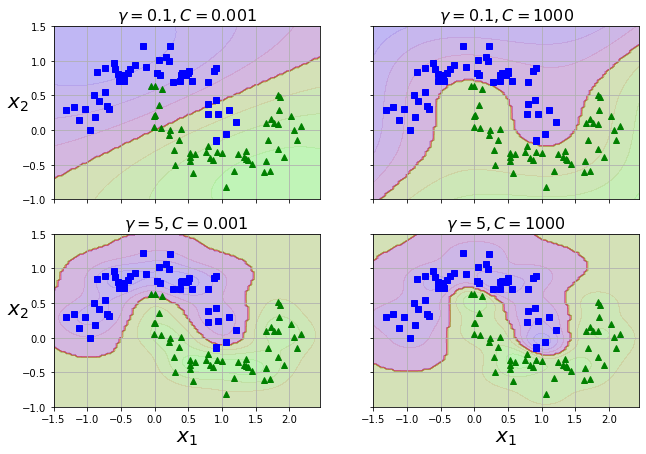

In [12]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

- 문자열 커널 : 텍스트 문서나 DNA 서열을 분류할 때 사용 ex) 문자열 서브시퀀스 커널, 레벤슈타인 거리 기반의 커널)

- 항상 선형 커널을 가장 먼저 시도(LinearSVC가 SVC(kernel = 'linear')보다 훨씬 빠르다) 
  - 특히 훈련 세트가 아주 크거나 특성 수가 많을 경우
-  훈련 세트가 너무 크지 않다면 가우시안 RBF 커널도 좋음 
- 교차 검증, 그리드 탐색을 사용해 다양한 커널 시도 

## 5.2.4 계산 복잡도 

# 5.3 SVM 회귀
- 일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 가능한 한 최대가 되도록 하는 대신, SVM 회귀는 제한된 마진 오류(즉, 도로 밖의 샘플) 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습한다. 

In [13]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [14]:
X,y

(array([[-0.25091976],
        [ 0.90142861],
        [ 0.46398788],
        [ 0.19731697],
        [-0.68796272],
        [-0.68801096],
        [-0.88383278],
        [ 0.73235229],
        [ 0.20223002],
        [ 0.41614516],
        [-0.95883101],
        [ 0.9398197 ],
        [ 0.66488528],
        [-0.57532178],
        [-0.63635007],
        [-0.63319098],
        [-0.39151551],
        [ 0.04951286],
        [-0.13610996],
        [-0.41754172],
        [ 0.22370579],
        [-0.72101228],
        [-0.4157107 ],
        [-0.26727631],
        [-0.08786003],
        [ 0.57035192],
        [-0.60065244],
        [ 0.02846888],
        [ 0.18482914],
        [-0.90709917],
        [ 0.2150897 ],
        [-0.65895175],
        [-0.86989681],
        [ 0.89777107],
        [ 0.93126407],
        [ 0.6167947 ],
        [-0.39077246],
        [-0.80465577],
        [ 0.36846605],
        [-0.11969501],
        [-0.75592353],
        [-0.00964618],
        [-0.93122296],
        [ 0

In [15]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5) #마진 1.5
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)

In [16]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel = "poly", degree = 2, C = 100, epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

In [17]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree =2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X,y)
svm_poly_reg2.fit(X,y)

SVR(C=0.01, degree=2, kernel='poly')

Text(0.5, 1.0, '$degree=2, C=0.01, \\epsilon = 0.1$')

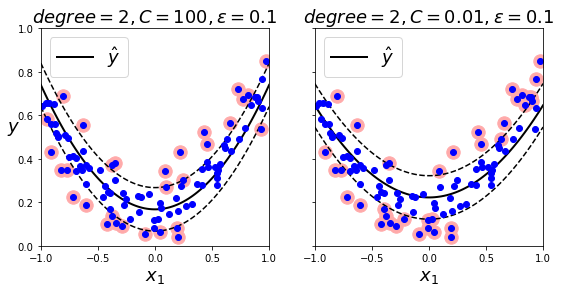

In [18]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

- 왼쪽 그래프는 규제가 거의 없고(아주 큰 C), 오른쪽 그래프는 규제가 훨씬 많다(작은 C).

# 5.4 SVM 이론

1. 서포트 벡터 머신의 근본 아이디어는 무엇인가요?
- 클래스 사이에 도로(마진)를 내는 것이다.

2. 서포트 벡터가 무엇인가요?
- 서포트 벡터는 마진의 경계에 놓인 샘플이다. 결정 경계는 서포트 벡터에 의해 결정된다.

3. SVM을 사용할 때 입력값의 스케일이 왜 중요한가요?
- 스케일이 맞지 않으면 크기가 작은 특성은 무시 될 수 있기 때문이다.

4. SVM 분류기가 샘플을 분류할 때 신뢰도 점수와 확률을 출력할 수 있나요?
- 신뢰도 점수는 출력 가능하지만 확률을 바로 출력할 수는 없다. 사이킷런에서 SVM 모델을 만들 때 probability = True로 설정한 후 SVM의 점수에 로지스틱 회귀를 훈련시켜 확률을 계산해야한다. (predict_proba(), predict_log_proba() 메서드 추가) 

5. 수백만 개의 샘플과 수백 개의 특성을 가진 훈련 세트에 SVM 모델을 훈련시키려면 원 문제와쌍대 문제 중 어떤 것을 사용해야 하나요?
- 커널 SVM은 쌍대 형식만 사용 가능하므로, 이 질문은 선형 SVM만 사용가능하다. 

6. RBF 커널을 사용해 SVM 분류기를 훈련시켰더니 훈련 세트에 과소적합된 것 같습니다.gamma를증가시켜야할까요, 감소시켜야할까요? C의 경우는 어떤가요?
- 과소 적합 된 경우 gamma와 C 모두 증가시켜 모델에 규제를 주어야한다.

7. 이미 만들어진 QP 알고리즘 라이브러리를 사용해 소프트 마진 선형 SVM 분류기를 학습시키려면 QP 매개변수(H. f, A, b)를 어떻게 지정해야 하나요?
- 

8. 선형적으로 분리되는 데이터셋에 LinearSVC를 훈련시켜보세요. 그런 다음 같은 데이터셋에 SVC와 SGDClassifier를 적용해보세요. 거의 비슷한모델이 만들어지는지 확인해보세요.

In [19]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1) #y값에서 0또는 1만 남기고 2는 삭제 -> 이진분류를 위해서
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#linear_svc
linear_svc = LinearSVC(C=1, loss='hinge')

linear_svc.fit(X_scaled,y)

#SVC
svc = SVC(kernel = 'linear', C=1)

svc.fit(X_scaled,y)

#SGDClassifier
alpha = 1 / (C * len(X))

from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss="hinge", learning_rate="constant",
                                            eta0 = 0.001, alpha = alpha,
                                           max_iter = 1000, tol = 1e-3)
SGD.fit(X_scaled,y)

SGDClassifier(alpha=1e-05, eta0=0.001, learning_rate='constant')

In [21]:
print("LinearSVC:", linear_svc.intercept_, linear_svc.coef_)
print("SVC:", svc.intercept_, svc.coef_)
print("SGD:", SGD.intercept_, SGD.coef_)

LinearSVC: [0.29588877] [[1.0607458  1.00177835]]
SVC: [0.32182521] [[1.04342638 0.94747825]]
SGD: [0.117] [[0.7799005  0.73237321]]


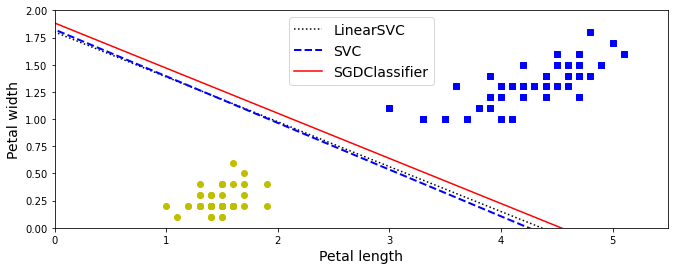

In [22]:
w1 = -linear_svc.coef_[0,0]/linear_svc.coef_[0,1]
b1 = -linear_svc.intercept_[0]/linear_svc.coef_[0,1]
w2 = -svc.coef_[0,0]/svc.coef_[0,1]
b2 = -svc.intercept_[0]/svc.coef_[0,1]
w3 = -SGD.coef_[0,0]/SGD.coef_[0,1]
b3 = -SGD.intercept_[0]/SGD.coef_[0,1]

#원래 scaler로 되돌리기 
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

9. MNIST 데이터셋에 SVM 분류기를훈련시켜보세요. SVM 분류기는 이진 분류기라서 OvR
전략을 사용해 10개의 숫자를 분류해야 합니다. 처리 속도를 높이기 위해 작은 검증 세트로
하이퍼파라미터를 조정하는 것이 좋습니다. 어느 정도까지 정확도를높일 수 있나요?

In [23]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [24]:
linear_svc = LinearSVC(C=1, loss='hinge')
linear_svc.fit(X_train,y_train)

C:\Users\qual9\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=1, loss='hinge')

In [25]:
from sklearn.metrics import accuracy_score

y_pred = linear_svc.predict(X_train)
accuracy_score(y_train, y_pred)

0.8712333333333333

C=1, loss='hinge' -> 정확도 : 0.84298

In [26]:
#scaler 조절
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float32))

In [27]:
linear_svc.fit(X_train_scaled, y_train)
y_pred = linear_svc.predict(X_train_scaled)
accuracy_score(y_train,y_pred)

C:\Users\qual9\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9305833333333333

scaler 조절 -> 정확도 : 0.9305

In [28]:
#커널 사용
SVC = SVC(gamma="scale") #gamma = 'scaler' 기본값 
SVC.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [30]:
y_pred = SVC.predict(X_train_scaled)
accuracy_score(y_train,y_pred)

0.9455333333333333

#커널 사용 -> 정확도 0.94551

10. 캘리포니아 주택 가격 데이터셋에 SVM 회귀를 훈련시켜보세요

In [37]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [42]:
SVM = LinearSVR(random_state=42)
SVM.fit(X_train_scaled, y_train)

C:\Users\qual9\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(random_state=42)

In [43]:
from sklearn.metrics import mean_squared_error

y_pred = SVM.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948642

In [44]:
np.sqrt(mse)

0.9819256687727764